# Relative feature tightness using part 7 for test data

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import numpy as np

from ast import literal_eval
import re
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles

## Dataset prep

### Making feature pointwise mutual information profiles

In [23]:
profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp0_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp1_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp2_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp3_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp4_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp5_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp6_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp8_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)
profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp9_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)

In [24]:
profile0.add_another_cooccurrence_profile(profile1)
profile0.add_another_cooccurrence_profile(profile2)
profile0.add_another_cooccurrence_profile(profile3)
profile0.add_another_cooccurrence_profile(profile4)
profile0.add_another_cooccurrence_profile(profile5)
profile0.add_another_cooccurrence_profile(profile6)
profile0.add_another_cooccurrence_profile(profile8)
profile0.add_another_cooccurrence_profile(profile9)

In [25]:
probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(profile0)

In [26]:
pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(probability_profile)

In [27]:
reference_profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp0_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp1_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp2_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp3_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp4_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp5_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp6_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp8_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp9_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)

In [28]:
reference_profile0.add_another_cooccurrence_profile(reference_profile1)
reference_profile0.add_another_cooccurrence_profile(reference_profile2)
reference_profile0.add_another_cooccurrence_profile(reference_profile3)
reference_profile0.add_another_cooccurrence_profile(reference_profile4)
reference_profile0.add_another_cooccurrence_profile(reference_profile5)
reference_profile0.add_another_cooccurrence_profile(reference_profile6)
reference_profile0.add_another_cooccurrence_profile(reference_profile8)
reference_profile0.add_another_cooccurrence_profile(reference_profile9)

In [29]:
reference_probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(reference_profile0)

In [30]:
reference_pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(reference_probability_profile)

### Making feature pointwise KL divergence profile between COCONUT and ZINC

In [31]:
difference_pkld_profile = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(
    probability_profile, reference_probability_profile)
difference_pkld_profile.df

value
feature1 feature2          
0        0         2.068281
         1         2.872632
         10        4.496093
         100       5.431967
         1000      3.330083
...                     ...
928      972      -0.027473
939      986      -1.027473
959      966      -3.486905
968      990      -3.486905
969      995      -0.027473

[2097997 rows x 1 columns]

### Sampling structures from COCONUT and ZINC datasets

In [32]:
coconut_samples = pd.read_csv('../data/CP1/COCONUT/COCOrandom.csv', delimiter = ' ')
coconut_samples = coconut_samples.drop(['Coconut_id'], axis=1)
coconut_samples['Name'] = 'COCONUT'

In [33]:
df_split_coco = np.array_split(coconut_samples, 10)

In [34]:
df_split_coco[7]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
270410,C1CCC(C23CC(CC4CCCN=C42)C2CCCCN2C3)NC1,315.267448,3.2440,LHZDKNLVYWYRSS-UHFFFAOYSA-N,LHZDKNLVYWYRSS,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[33, 51, 118, 162, 264, 305, 313, 325, 378, 50..."
270411,COc1cccc(C=CC(O)C(O)C(O)C(C)OC)c1CO,312.157288,0.3183,ODQVGZIJMRNPQK-UHFFFAOYSA-N,ODQVGZIJMRNPQK,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 40, 80, 146, 210, 222, 227, 249, 283, 368,..."
270412,COc1ccc(CNC(=O)c2cc3c([nH]c4ccccc43)c(-c3ccc(C...,449.210327,6.4451,QRNUBGNGCMKPQO-UHFFFAOYSA-N,QRNUBGNGCMKPQO,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 68, 80, 119, 197, 223, 255, 283, 310, 322,..."
270413,CC(=O)OC(CCC(C)=CCCC(=O)c1ccc(O)cc1O)C(C)(O)CC...,432.251189,5.2163,JDVWBXDBNKCEEE-UHFFFAOYSA-N,JDVWBXDBNKCEEE,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 24, 67, 69, 80, 114, 205, 237, 357, 370, 3..."
270414,COCNc1cc2c3c([nH+]1)-n1cc4cc(C56CCOCC5CCc5cccc...,1004.484442,10.6355,ANWQUIINLJNKGK-UHFFFAOYSA-O,ANWQUIINLJNKGK,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[22, 48, 49, 58, 65, 80, 95, 104, 128, 155, 21..."
...,...,...,...,...,...,...,...,...
309034,S=C(NNc1ccccc1)NC(c1ccccc1)(c1ccccc1)c1ccccc1,409.161269,5.4697,RFKBPYKOKYSLIQ-UHFFFAOYSA-N,RFKBPYKOKYSLIQ,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[97, 105, 110, 114, 191, 354, 389, 639, 696, 7..."
309035,COc1cc(C(O)C(O)OC2OC(COC(=O)C=Cc3cc(OC)c(O)c(O...,568.179206,-0.4438,LTEDCNNXJUTLEF-UHFFFAOYSA-N,LTEDCNNXJUTLEF,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 31, 58, 80, 147, 176, 202, 220, 227, 249, ..."
309036,CC(=O)OC1CC2(C)C3CC(OC4OC(CO)C(O)C(O)C4O)C4C(C...,910.492601,2.4365,GZJSPFHGRIJXBF-UHFFFAOYSA-N,GZJSPFHGRIJXBF,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 114, 176, 222, 242, 249, 260, 267, 303, 3..."
309037,CC(C)=CCCC(C)C1CC(O)C2(C)C3=CCC4C(C)(CCC(O)C4(...,440.365431,7.2259,CCFQLQIYEHITNK-UHFFFAOYSA-N,CCFQLQIYEHITNK,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 8, 61, 63, 80, 111, 137, 203, 283, 401, 44..."


In [35]:
zinc_samples = pd.read_csv('../data/CP1/ZINC/ZINCrandom.csv', delimiter = ' ')
zinc_samples = zinc_samples.drop(['Zinc_id'], axis=1)

In [36]:
df_split_zinc = np.array_split(zinc_samples, 10)
df_split_zinc[7]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
265309,Cc1cnnc(N2CCS[C@H](C(F)(F)F)C2)c1,263.070403,2.26912,NFKXVPWUFOJQHO-QMMMGPOBSA-N,NFKXVPWUFOJQHO,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[114, 177, 241, 255, 281, 377, 378, 407, 436, ..."
265310,CC1=N[C@@H]2NN=CN2C(O)=C1,152.069811,-0.00760,JVTCVGIAQSOTBK-ZCFIWIBFSA-N,JVTCVGIAQSOTBK,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[84, 106, 300, 378, 384, 397, 519, 739, 807, 8..."
265311,CCCCC(CCCC)c1ccnc(N)c1,220.193949,4.12780,CZBMURBNJQQQDC-UHFFFAOYSA-N,CZBMURBNJQQQDC,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 62, 80, 143, 294, 377, 378, 591, 627, 739,..."
265312,CC(C)CCN1C[C@@H]2OCCN(c3ncc(F)cn3)[C@@H]2C1,294.185590,1.55120,DUGKINZEMKOWKF-KGLIPLIRSA-N,DUGKINZEMKOWKF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 21, 68, 80, 102, 283, 340, 378, 656, 667, ..."
265313,O=C(Cc1ccc(F)cc1)Nc1nnc(-c2ccccc2)s1,313.068511,3.52540,MDWISCUYGLSIGD-UHFFFAOYSA-N,MDWISCUYGLSIGD,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 80, 90, 162, 310, 325, 378, 385, 389, 650..."
...,...,...,...,...,...,...,...,...
303205,CCOC(=O)c1c(NC(=O)c2cc(-c3ccc(CC)cc3)nc3ccccc2...,484.182064,6.83350,HMHFQFSULDXOOG-UHFFFAOYSA-N,HMHFQFSULDXOOG,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 42, 50, 54, 80, 145, 147, 162, 216, 220, 2..."
303206,CN(C)c1nccnc1[C@H]1CN(Cc2cc3ccccc3s2)CCO1,354.151432,3.33080,FUFKNLNNLYPNRI-MRXNPFEDSA-N,FUFKNLNNLYPNRI,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 95, 162, 259, 377, 378, 388, 461, 556, 65..."
303207,COc1ccc(-c2oc3ncn4nc(CSc5nc6ccccc6o5)nc4c3c2-c...,535.131425,6.65520,ZFGYKGBESMBREX-UHFFFAOYSA-N,ZFGYKGBESMBREX,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 115, 116, 147, 153, 212, 289, 322, 341, 3..."
303208,Cc1sc(NC(=O)c2ccccn2)c(C(N)=O)c1C,275.072848,2.11114,XXDWSRDIRVDROE-UHFFFAOYSA-N,XXDWSRDIRVDROE,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 50, 122, 140, 162, 214, 216, 252, 309, 313..."


In [37]:
joint_samples = pd.concat((df_split_coco[7], df_split_zinc[7]), ignore_index=True)

In [38]:
for x in joint_samples.index:
    a = joint_samples['Bitset'][x]
    a = a.split(", ")
    a = re.sub('\[', '', str(a))
    a = re.sub('\]', '', str(a))
    tup = literal_eval(a)
    joint_samples['Bitset'][x] = tup

/var/tmp/pbs.43231.lich-compute.vscht.cz/ipykernel_11997/3101749155.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_samples['Bitset'][x] = tup


## Relative feature tightness against a PMI interrelation profile

In [39]:
joint_samples['RFT'] = joint_samples['Bitset'].apply(
    lambda x: difference_pkld_profile.relative_feature_divergence(x))

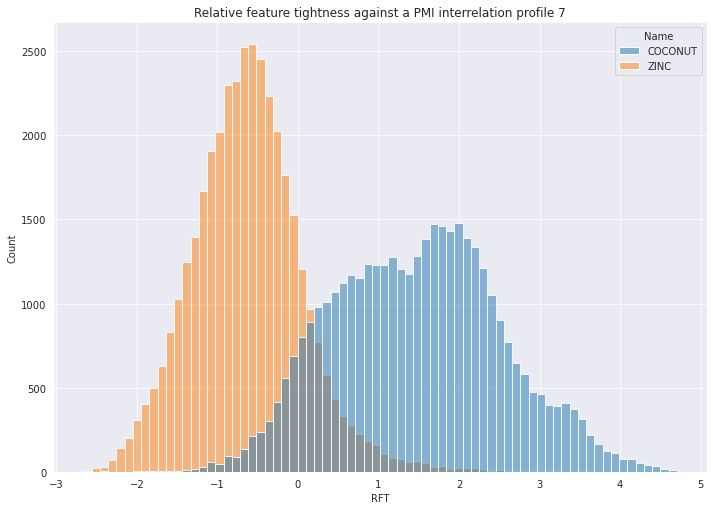

In [40]:
a4_dims = (11.7, 8.27)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(joint_samples, x='RFT', hue='Name')
plt.title('Relative feature tightness against a PMI interrelation profile 7')
plt.savefig(f"../images//joint_samples_RFT7.svg", format="svg")

According to the histogram, there is a visible split between Relative feature tightness distribution against the pointwise KL divergence profile between COCONUT and ZINC datasets, based on their radius 2 fragments. Larger fragments might diverge even further.

# ROC curve

In [41]:
from matplotlib.pyplot import figure
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(joint_samples['Name'], joint_samples['RFT'], pos_label = 'COCONUT')
roc_auc = metrics.auc(fpr, tpr)

<Figure size 432x288 with 0 Axes>

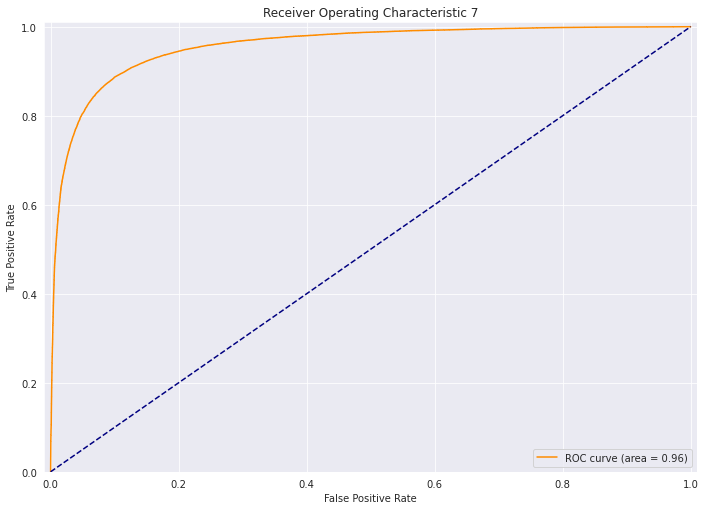

In [42]:
plt.figure()
figure(figsize=(11.7, 8.27))
plt.plot(fpr,tpr,color="darkorange",label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic 7')
plt.legend(loc="lower right")
plt.savefig(f"../images//joint_samples_ROC7.svg", format="svg")
plt.show()